<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2006%20%3A%20Recurrent%20Neural%20Networks%2C%20Time%20Series%20and%20Sequence%20Data/07_autoregressive_linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LINEAR MODEL IMPLEMENTATION**

IMPORT THE LIBRARIES

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PREPARE THE DATA

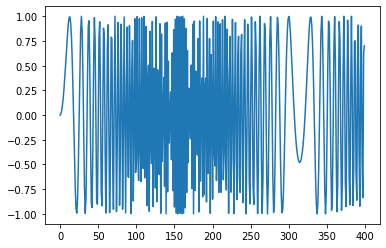

In [3]:
## make the data
series = np.sin((0.1 * np.arange(400)) ** 2)

## plot the series
plt.plot(series)
plt.show()

In [4]:
## build the dataset. Supervised Learning Dataset.
## lets see if we can use T past values to predict the next values.
T = 10
D = 1
X = []
Y = []

## loop over the range of len of series.
## and populate the X and Y.
for t in range(len(series) - T):
  #print(t)  ## 0 to 190
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)  ## make it NxT
Y = np.array(Y)
N = len(X)
print("X Shape : ", X.shape, "Y Shape : ", Y.shape)

X Shape :  (390, 10) Y Shape :  (390,)


BUILD AN AUTOREGRESSIVE LINEAR MODEL

In [5]:
## build the model
i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i, x)
model.summary()

## compile the model
model.compile(
    loss = "mse",
    optimizer = Adam(learning_rate = 0.1)
)

## train the model
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 100,
    validation_data = (X[-N//2:], Y[-N//2:])
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 2s 57ms/step - loss: 1.1418 - val_loss: 0.5143
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 0.5653 - val_loss: 0.7873
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6007 - val_loss: 0.7108
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5476 - val_loss: 0.6369
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - los

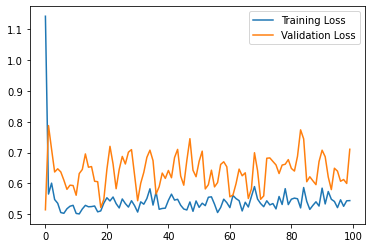

In [6]:
## plotting the loss
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show()

Here the Loss is generalized around 0.5. Which is not that Good for a Model.

13/13 [==============================] - 0s 3ms/step
(390, 1)


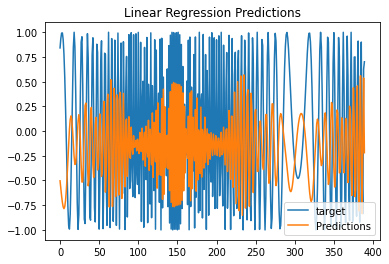

In [7]:
## do a one-step-forecast.
## even the one step forecast fails badly.
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

## plot the output vs predictions.
plt.plot(Y, label = "target")
plt.plot(predictions, label = "Predictions")
plt.title("Linear Regression Predictions")
plt.legend();
plt.show();

This result is a One Step Forecast. The Result is Pretty bad.
So we can conclude that, the Multi step forecast would be Pretty Bad.

1/1 [==============================] - 0s 30ms/step


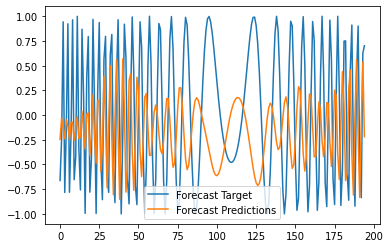

In [8]:
## wrong forecast using the true targets.
validation_target = Y[-N//2:]
# print(len(validation_target))
validation_predictions = []  ## empty list need to be appended after making the predictions.

## index of the first validation input
i = -N//2
# print(i)

## looping through the while loop
while len(validation_predictions) < len(validation_target):
  ## predict the model
  p = model.predict(X[i].reshape(1,-1))[0,0]
  # print(p)
  i += 1

  ## update the prediction list
  validation_predictions.append(p)

## plot the figure using the target and predictions.
plt.plot(validation_target, label = "Forecast Target")
plt.plot(validation_predictions, label = "Forecast Predictions")
plt.legend();
plt.show();

1/1 [==============================] - 0s 31ms/step


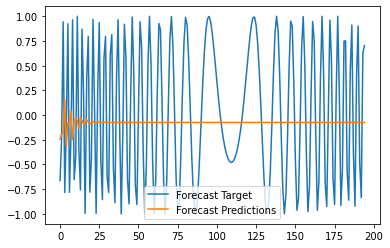

In [9]:
## multi step forecast.
## forecast future values only using the self predictions for making the future predictions.
validation_target = Y[-N//2:]
# print(len(validation_target))
validation_predictions = []  ## empty list need to be appended after making the predictions.

## last train input
last_x = X[-N//2]  ## 1D array of length T

## looping through the while loop
while len(validation_predictions) < len(validation_target):
  ## predict the model
  p = model.predict(last_x.reshape(1,-1))[0,0]

  ## update the prediction list
  validation_predictions.append(p)

  ## make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

## plot the figure using the target and predictions.
plt.plot(validation_target, label = "Forecast Target")
plt.plot(validation_predictions, label = "Forecast Predictions")
plt.legend();
plt.show();


Here, the Linear Model does a terrible Forecast.

***